In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.odr import * 


In [2]:
data = pd.read_csv('ag3.txt', header = 0, names = ['b-v', 'v'])
data.head()

,b-v,v
0,1.204533,12.559566
1,0.700453,8.983786
2,1.582116,15.913256
3,1.540805,15.910005
4,1.023942,11.734744


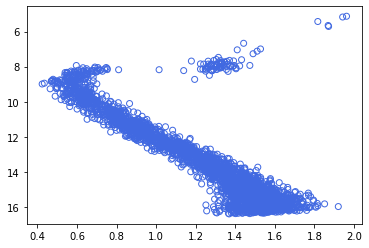

In [3]:
plt.gca().invert_yaxis()
plt.scatter(data['b-v'], data['v'], color = 'none', edgecolor = 'royalblue')

In [4]:
x = data['b-v']
y = data['v']

Text(0, 0.5, 'V')

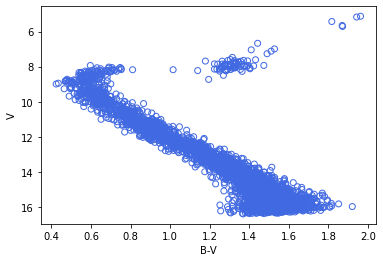

In [5]:
plt.gca().invert_yaxis()
plt.scatter(x,y, color = 'none', edgecolor = 'royalblue')
plt.xlabel('B-V')
plt.ylabel('V')

In [6]:
def linear_func(p, x):
    m, c = p
    return m*x + c

# Model object
modelo = Model(linear_func)

# test data and error

# Create a Data object
data1 = Data(x, y)

initialguess = [0,0]
odr = ODR(data1, modelo, beta0=initialguess)


# Run the regression.
odr.set_job(fit_type=2) #0 = implicit ODR, 1 = explicit ODR, 2 = ordinary least squares
out = odr.run()

#print fit parameters and 1-sigma estimates
popt = out.beta
perr = out.sd_beta

nstd = 1. # to draw 5-sigma intervals
popt_up = popt + nstd * perr
popt_dw = popt - nstd * perr



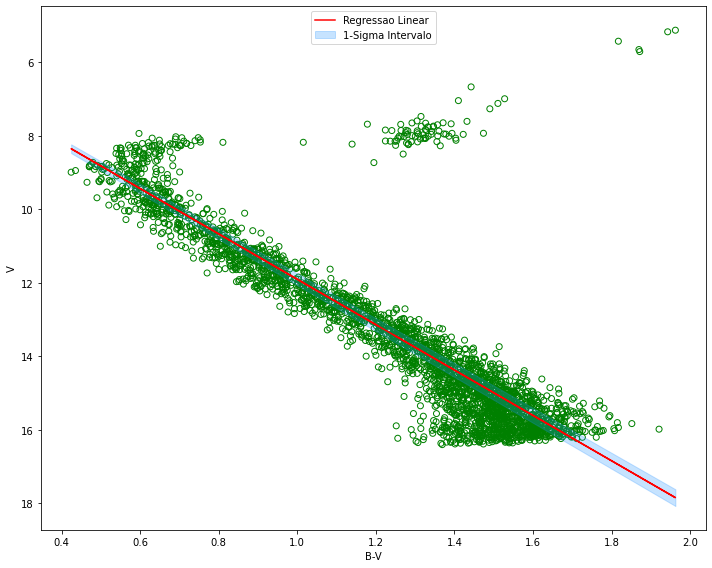

In [7]:
t_fit = np.linspace(x.min(), x.max(), len(x))
fit = linear_func(popt, t_fit)
fit_up = linear_func(popt_up, t_fit)
fit_dw= linear_func(popt_dw, t_fit)  

fig, ax = plt.subplots(figsize=(10,8))
fig.gca().invert_yaxis()

#ax.plot(t_fit, fit, 'r', color = 'red', label='Regressao Linear')
ax.plot(x,popt[0]*x + popt[1], 'r', color = 'red', label='Regressao Linear')
ax.scatter(x,y, color = 'none', edgecolor = 'green')
ax.fill_between(t_fit, fit_up, fit_dw, alpha=.25, label='1-Sigma Intervalo', color = 'dodgerblue')
ax.legend(framealpha=0.8, loc = 'upper center')
ax.set_xlabel('B-V')
ax.set_ylabel('V')
fig.tight_layout()

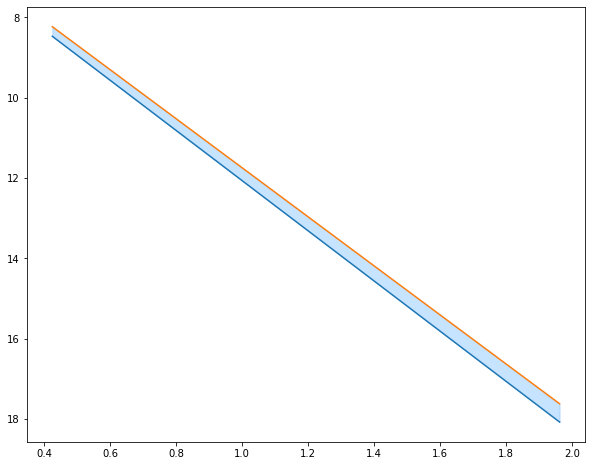

In [8]:
plt.figure(figsize=(10,8))
plt.gca().invert_yaxis()
plt.plot(t_fit,t_fit*popt_up[0] + popt_up[1]) #Regressao linear para o sigma superior
#plt.plot(t_fit, fit, 'r', color = 'red', label='Regressao Linear') Linha da regressao normal
plt.plot(t_fit,t_fit*popt_dw[0] + popt_dw[1]) #Regressao linear para o sigma superior

plt.fill_between(t_fit, fit_up, fit_dw, alpha=.25, label='1-Sigma Intervalo', color = 'dodgerblue')

In [9]:
mup, bup = popt_up[0],popt_up[1]
mdw, bdw = popt_dw[0], popt_dw[1]

xadj = []
yadj = []

for a,b in zip(x,y):
    if (a*mup + bup) >= b and (a*mdw + bdw) <= b:
        xadj.append(a)
        yadj.append(b)
xadj =np.asarray(xadj)
yadj = np.asarray(yadj)

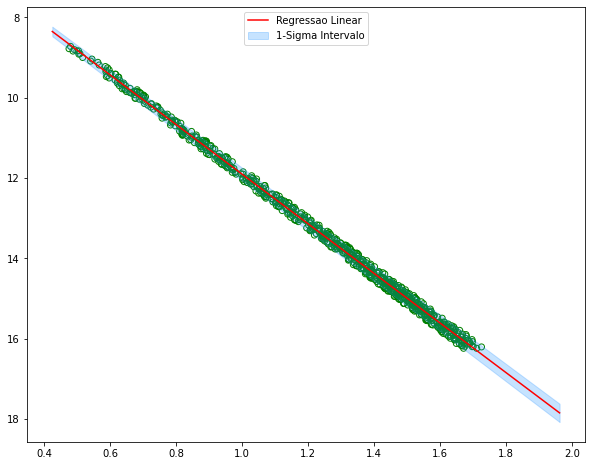

In [10]:
plt.figure(figsize=(10,8))
plt.gca().invert_yaxis()
plt.plot(t_fit, fit, 'r', color = 'red', label='Regressao Linear')
plt.scatter(xadj,yadj, color = 'none', edgecolor = 'green')
plt.fill_between(t_fit, fit_up, fit_dw, alpha=.25, label='1-Sigma Intervalo', color = 'dodgerblue')
plt.legend(framealpha=0.8, loc = 'upper center')

In [11]:
estrelas_antes = len(x)
estrelas_depois = len(xadj)

print('Havia',estrelas_antes, 'estrelas antes do sigma-clipping.' )
print(estrelas_antes - estrelas_depois, 'estrelas foram retiradas.')
print('Apenas', estrelas_depois, 'remanesceram no intervalo 1-sigma.')

Havia 2842 estrelas antes do sigma-clipping.
2087 estrelas foram retiradas.
Apenas 755 remanesceram no intervalo 1-sigma.


In [12]:
xout = []
yout = []
for a,b in zip(x,y):
    if a not in xadj and b not in yadj:
        xout.append(a)
        yout.append(b)
xout =np.asarray(xout)
yout = np.asarray(yout)

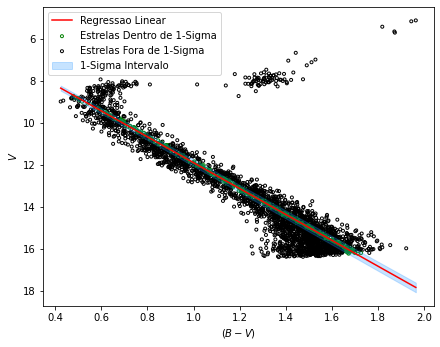

In [13]:
plt.figure(figsize=(7,5.5)) 
plt.gca().invert_yaxis()
plt.plot(t_fit, fit, 'r', color = 'red', label='Regressao Linear')
plt.scatter(xadj,yadj, marker='.', color = 'none', edgecolor = 'green', label = 'Estrelas Dentro de 1-Sigma')
plt.scatter(xout,yout, marker = ".",color = 'none', edgecolor = 'black', label = 'Estrelas Fora de 1-Sigma')
plt.fill_between(t_fit, fit_up, fit_dw, alpha=.25, label='1-Sigma Intervalo', color = 'dodgerblue')
plt.legend(framealpha=0.8, loc = 'best')
plt.xlabel(r"$(B-V)$")
plt.ylabel(r"$V$");
#plt.savefig('test.png', format = 'png')

In [14]:
59/185, 154/428, 548/2842 #fit type = 0

(0.31891891891891894, 0.3598130841121495, 0.1928219563687544)

In [15]:
80/185, 164/428, 755/2842

(0.43243243243243246, 0.38317757009345793, 0.26565798733286416)

In [16]:
#Main Sequence

mainsequence = Data(xadj, yadj)

initialguess = [0,0]
odr = ODR(mainsequence, modelo, beta0=initialguess)


# Run the regression.
odr.set_job(fit_type=2) #0 = implicit ODR, 1 = explicit ODR, 2 = ordinary least squares
out = odr.run()

#print fit parameters and 1-sigma estimates
popt_mainsequence = out.beta
perr_mainsequence = out.sd_beta


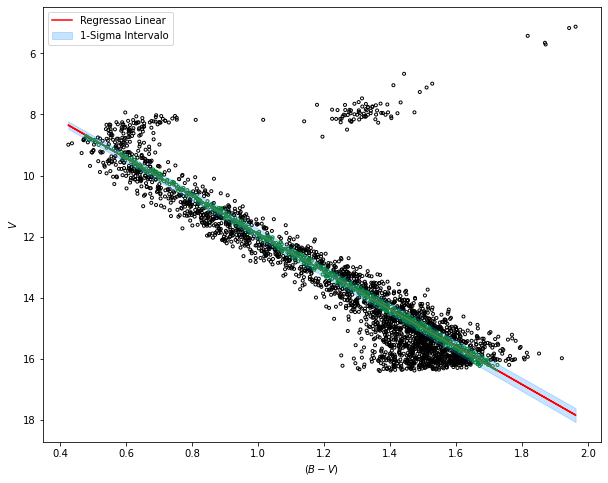

In [17]:
plt.figure(figsize=(10,8))
plt.gca().invert_yaxis()
plt.plot(x, popt[0]*x + popt[1], 'r', color = 'red', label='Regressao Linear')
plt.scatter(xadj,yadj, marker='.', color = 'none', edgecolor = 'green')
plt.scatter(xout,yout, marker = ".",color = 'none', edgecolor = 'black')
#plt.plot(xadj, xadj*result.slope + result.intercept, color = 'seagreen')
plt.plot(xadj, xadj*popt_mainsequence[0] + popt_mainsequence[1], color = 'seagreen')
plt.fill_between(t_fit, fit_up, fit_dw, alpha=.25, label='1-Sigma Intervalo', color = 'dodgerblue')
plt.legend(framealpha=0.8, loc = 'best')
plt.xlabel(r"$(B-V)$")
plt.ylabel(r"$V$");
#plt.savefig('test.png', format = 'png')

In [18]:
#ag1 era aproximadamente 6.9 sei la quantos anos, ag2 era um pouco mais velho, 7.2, e o 3 ja era 9...

In [19]:
f = open("LinearRegressAG3.txt", "w")
f.write("Slope, Intercept \n")
f.write(str(popt_mainsequence[0]) + ', ' + str(popt_mainsequence[1]) + '\n')
f.write(str(perr_mainsequence[0]) + ', ' + str(perr_mainsequence[1]) + '\n')
f.close()

In [20]:
popt,popt_mainsequence

(array([6.17085256, 5.73234343]), array([6.18476432, 5.72005784]))